In [0]:
import math
import numpy as np
from matplotlib import pyplot as plt

## IE550-A

EFC 1 - Data de Entrega: 20/03

### Questão 1. Convolução

**a)** Determine o comprimento P da sequência y[n] gerada na saída do sistema em função de K e D.
Como tanto a entrada x[n] quanto a resposta ao impulso h[n] são sequencias de comprimento finito, ́e possıvel determinar a sa ́ıda y[n] explorando uma representação vetorial. Seja y = [y[0] y[1] · · · y[P−1]] T o vetor que descreve a saıda y[n]. Então, podemos escrever que: y = Hx, (2)

onde H ∈ R P x K é a matriz de convolução do sistema e x denota o vetor associado ao sinal de entrada.


**Resposta**

Tendo que a convolução descreve um operador linear entre duas funções que resulta em uma terceira com tamanho total a somatória de ambas, o tamanho do vetor de saída y[n] é igual a K + D - 1.

**b)** Mostre que este procedimento para o calculo da convolução esta correto, identificando quem e a matriz *H* e o vetor *x*.

**Resposta**

Se *K* = 5 e *D*= 3, portanto:

P = K + D - 1

P = 5 + 3 - 1

P = 7

Temos:

y[0] = x[0] + h[0]

y[1] = x[1] + h[0]

In [24]:
K = 5
D = 3
x = np.arange(K)
h = np.flip(np.arange(D), axis=0)
print('Tam. x:       ', len(x))
print('Tam. h:       ', len(h))
print('Tam. (x * h): ', len(np.convolve(x, h)))

Tam. x:        5
Tam. h:        3
Tam. (x * h):  7


### Questão 2. Resposta em Frequência

In [0]:
def sistema_desconhecido(x):
    N = 400
    n = np.arange(N)
    hn = (1/2) * np.exp(-0.3 * abs(n - 100)) * np.cos(math.pi/10 * n)
    y = np.convolve(hn, x)
    return y

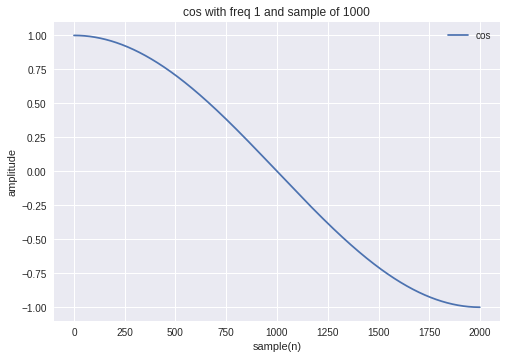

In [26]:
# Generate a cos wave
Fs = 1000     # sampling rate, Hz, must be integer
f = 1         # sine frequency, Hz, may be float
duration = 2  # in seconds, may be float
x = np.arange(Fs * duration)
cos = np.cos(np.pi / 2 * f * x / Fs)

plt.plot(cos, label='cos')
plt.title('cos with freq 1 and sample of 1000')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()
plt.show()

Média de h1: 0.04027352385482645


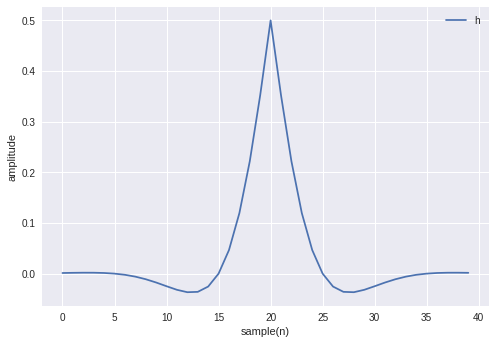

In [32]:
y = sistema_desconhecido(cos)

xn = np.zeros(y.shape)
xn[:len(cos)] = cos
h = (np.fft.ifft(np.fft.fft(y) / np.fft.fft(xn))).real

h1 = h[80:120]
print('Média de h1:', np.mean(h1))

plt.plot(h1, label='h')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()
plt.show()

Média de h: 1.7039812456687878e-05
Média de cos: 0.0005
False


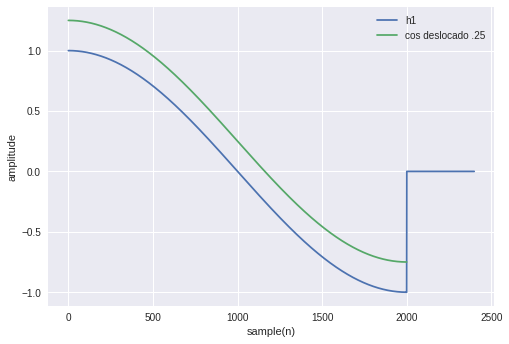

In [43]:
xn = np.zeros(y.shape)
xn[:len(h)] = h
h = (np.fft.ifft(np.fft.fft(y) / np.fft.fft(xn))).real

print('Média de h:', np.mean(h))
print('Média de cos:', np.mean(cos))
print(np.array_equal(h1, cos))

plt.plot(h1, label='h1')
plt.plot(cos + .25, label='cos deslocado .25')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()
plt.show()